In [114]:
# @title Load all Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import math
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [115]:
# @title Import Dataset
df = pd.read_csv('/content/weatherAUS.csv')
df.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145450,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
145451,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
145452,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
145453,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [116]:
shape = df.shape
row = shape[0]
col = shape[1]

In [117]:
# Check Missing values for each column
missing_values = df.isnull().sum()
print(missing_values)


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [118]:
# Get the count of each unique RainTomorrow name
location_counts = df['RainTomorrow'].value_counts()

# Display the result
print(location_counts)


RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64


In [119]:
df["Date"]=pd.to_datetime(df["Date"])
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year
df.drop("Date",axis=1,inplace=True)

In [120]:
#Fill the missing values NAN with 0
# Fill with the mean for temperature-related columns
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)

# Fill with the median for rainfall-related columns
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)

# Fill with the median for humidity-related columns
df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].median(), inplace=True)

# Fill with the mean for wind speed columns
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(), inplace=True)

# Fill with median for pressure columns
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True)

# Fill with the mean for evaporation, sunshine, and cloud-related columns
df['Evaporation'].fillna(df['Evaporation'].mean(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].mean(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].mean(), inplace=True)

# Fill with mode for wind direction columns
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)

# Fill with mode for RainToday and RainTomorrow
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)




In [121]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,...,1007.1,8.000000,4.50993,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,...,1007.8,4.447461,4.50993,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,...,1008.7,4.447461,2.00000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,...,1012.8,4.447461,4.50993,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,...,1006.0,7.000000,8.00000,17.8,29.7,No,No,5,12,2008


In [122]:
# @title Encode all object column
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to each object column
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [123]:
final_data = df.copy()
final_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,1,12,2008
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2,12,2008
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,3,12,2008
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,4,12,2008
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,5,12,2008


In [124]:
correlation = final_data.corr()
target_corr = correlation['RainTomorrow'].sort_values(ascending=False)
target_corr = target_corr.drop('RainTomorrow')



In [125]:
import numpy as np

# Assuming `target_corr` is a pandas Series of correlation values
mini = np.min(target_corr)
maxi = np.max(target_corr)

print("Minimum correlation value:", mini)
print("Maximum correlation value:", maxi)


Minimum correlation value: -0.32153330660563373
Maximum correlation value: 0.433167150093326


In [126]:
import pandas as pd

# Assuming `final_data` is your DataFrame
# Calculate the correlation matrix
correlation = final_data.corr()

# Extract the correlations with 'RainTomorrow'
target_corr = correlation['RainTomorrow'].sort_values(ascending=False)

# Define thresholds for high and medium correlation
high_threshold = 0.25
medium_threshold = 0.10

# Select features with correlation higher than the high threshold or the medium threshold
selected_features = target_corr[(target_corr > high_threshold) |
                                (target_corr > medium_threshold)].index.tolist()

# Optionally, remove 'RainTomorrow' from the list if it is present
if 'RainTomorrow' in selected_features:
    selected_features.remove('RainTomorrow')

print("Selected features with high and medium correlation:")
print(selected_features)

# Create a new dataset with these features
new_data = final_data[selected_features + ['RainTomorrow']]


Selected features with high and medium correlation:
['Humidity3pm', 'RainToday', 'Cloud3pm', 'Humidity9am', 'Cloud9am', 'Rainfall', 'WindGustSpeed']


In [127]:
new_data.shape

(145460, 8)

In [128]:
new_data.tail(20)

,Humidity3pm,RainToday,Cloud3pm,Humidity9am,Cloud9am,Rainfall,WindGustSpeed,RainTomorrow
145440,6.0,0,4.50993,29.0,4.447461,0.0,43.00000,0
145441,19.0,0,4.50993,27.0,4.447461,0.0,43.00000,0
145442,26.0,0,4.50993,58.0,4.447461,0.0,39.00000,0
145443,23.0,0,4.50993,54.0,4.447461,0.0,43.00000,0
145444,29.0,0,4.50993,56.0,4.447461,0.0,46.00000,0
145445,24.0,0,4.50993,59.0,4.447461,0.0,33.00000,0
145446,29.0,0,4.50993,56.0,4.447461,0.0,46.00000,0
145447,32.0,0,4.50993,57.0,4.447461,0.0,35.00000,0
145448,28.0,0,4.50993,60.0,4.447461,0.0,22.00000,0
145449,24.0,0,4.50993,59.0,4.447461,0.0,19.00000,0


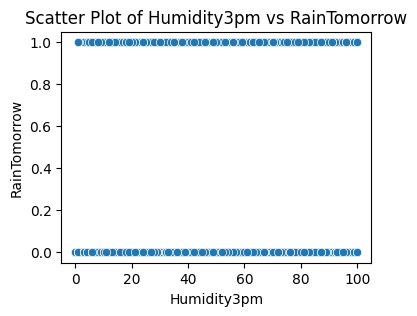

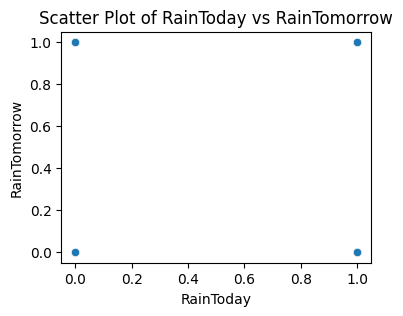

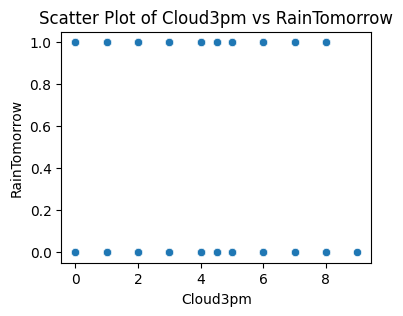

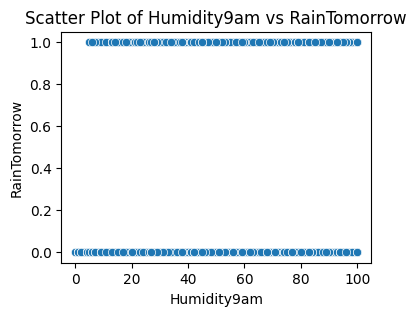

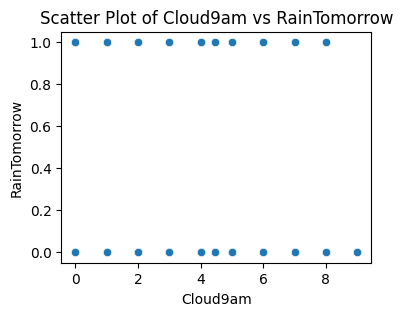

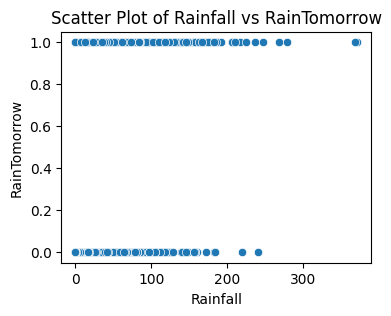

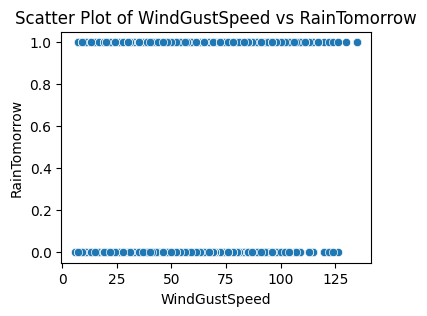

In [129]:


# Prepare the feature matrix `X` and target variable `y`
x = new_data[selected_features]
y = new_data['RainTomorrow']

# Plot scatter plots for each feature against the target
for feature in x.columns:  # Corrected to loop through the feature names
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=df[feature], y=y)  # Corrected x and y parameters
    plt.title(f'Scatter Plot of {feature} vs RainTomorrow')  # Corrected the title to reflect the feature name
    plt.xlabel(feature)  # Set x-axis label to feature name
    plt.ylabel('RainTomorrow')  # Set y-axis label to the target name
    plt.show()


In [130]:
# @title Logistic Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Prepare the feature matrix `X` and target variable `y`
X = new_data[selected_features]
y = new_data['RainTomorrow']




# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Identify correct predictions
correct_indices = y_test.index[y_test == y_pred].tolist()

# Convert the test indices back to DataFrame to access features
test_data = new_data.loc[y_test.index]

# Print details of correct predictions (first 20 for brevity)
print("Correct Predictions:")
for idx in correct_indices[:20]:
    try:
        # Find the position of idx in the test set
        test_idx = y_test.index.get_loc(idx)

        print(f"Index: {idx}")
        print("Features:")
        print(test_data.loc[idx, selected_features])
        print("Predicted:", y_pred[test_idx])
        print("Actual:", y_test.loc[idx])
        print("-" * 50)
    except KeyError:
        print(f"Index {idx} not found in the test set.")
    except IndexError:
        print(f"Index {idx} is out of bounds in the prediction array.")

# Print confusion matrix for overall understanding
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report for additional performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Correct Predictions:
Index: 30234
Features:
Humidity3pm      22.00000
RainToday         0.00000
Cloud3pm          1.00000
Humidity9am      61.00000
Cloud9am          0.00000
Rainfall          0.00000
WindGustSpeed    40.03523
Name: 30234, dtype: float64
Predicted: 0
Actual: 0
--------------------------------------------------
Index: 68427
Features:
Humidity3pm      38.000000
RainToday         0.000000
Cloud3pm          4.509930
Humidity9am      50.000000
Cloud9am          4.447461
Rainfall          0.000000
WindGustSpeed    59.000000
Name: 68427, dtype: float64
Predicted: 0
Actual: 0
--------------------------------------------------
Index: 28624
Features:
Humidity3pm      51.000000
RainToday         0.000000
Cloud3pm          4.509930
Humidity9am      99.000000
Cloud9am          4.447461
Rainfall          0.000000
WindGustSpeed    30.000000
Name: 28624, dtype: float64
Predicted: 0
Actual: 0
--------------------------------------------------
Index: 573
Features:
Humidity3pm      54.0
R

In [140]:
X_test.head(10)
y_test.head(10)

,RainTomorrow
100721,1
30234,0
68427,0
28624,0
31173,0
573,0
120056,0
43057,1
28966,0
90691,1


In [132]:
# Print the row at index 573
raw_data = new_data.iloc[114054]
print("Raw Data at Index 573:")
print(raw_data)

# Prepare feature and target for this specific row
raw_data_Xtest = raw_data.drop('RainTomorrow')  # Drop target variable
raw_data_Xtest = raw_data_Xtest.values.reshape(1, -1)  # Reshape for prediction

# Make a prediction
prediction = log_reg.predict(raw_data_Xtest)
print(f"Prediction for row 10039: {prediction[0]}")

# Actual target value
actual_value = raw_data['RainTomorrow']
print(f"Actual value for row 10039: {actual_value}")


Raw Data at Index 573:
Humidity3pm      69.000000
RainToday         0.000000
Cloud3pm          4.509930
Humidity9am      66.000000
Cloud9am          4.447461
Rainfall          0.000000
WindGustSpeed    31.000000
RainTomorrow      0.000000
Name: 114054, dtype: float64
Prediction for row 10039: 0
Actual value for row 10039: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [133]:
X_train.shape

(116368, 7)

In [134]:
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy*100)

Accuracy: 83.42155919153032


In [136]:
# @title Knn Classifier Algorithm
k = math.sqrt(len(X_train))
knn = KNeighborsClassifier(n_neighbors=int(k))
knn.fit(X_train, y_train)
y2_pred = knn.predict(X_test)
y2_pred


array([0, 0, 0, ..., 0, 0, 0])

In [137]:
# @title Check Accuracy for Knn classifier
accuracyForLogistic2 = accuracy_score(y_test, y2_pred)
print("Accuracy:", accuracyForLogistic2*100)

Accuracy: 83.76185893029012


In [ ]:
# @title Confusion matrix for knn classifier




# Confusion matrix
conf_matrix2 = confusion_matrix(y_test, y2_pred)

# Classification report
class_report2 = classification_report(y_test, y2_pred)

# Plotting the confusion matrix using Seaborn for an attractive visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Print the classification report
print('Classification Report:')
print(class_report2)



In [ ]:
#@title Naive Bayes
model3 = GaussianNB()
model3.fit(X_train, y_train)
y3_pred = model3.predict(X_test)
y3_pred


In [ ]:
#@title Accuracy
accuracyForLogistic3 = accuracy_score(y_test, y3_pred)
print("Accuracy:", accuracyForLogistic3*100)

In [ ]:
# @title Confusion matrix for Naive Bayes

# Confusion matrix
conf_matrix3 = confusion_matrix(y_test, y3_pred)

# Classification report
class_report3 = classification_report(y_test, y3_pred)

# Plotting the confusion matrix using Seaborn for an attractive visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Print the classification report
print('Classification Report:')
print(class_report3)




In [ ]:
#@title Decision Tree
model4 = DecisionTreeClassifier()
model4.fit(X_train, y_train)
y4_pred = model4.predict(X_test)
y4_pred

In [ ]:
accuracy4 = accuracy_score(y4_pred, y_test)
print("Accuacy is: ", accuracy4*100)

In [ ]:
#@title Pickle File
with open('Classifier.pkl', 'wb') as file:
  pickle.dump(log_reg, file)

In [ ]:
X_test = np.array(X_test)
print(X_test[:,6])

In [ ]:
X_test.head()